In [4]:
import yfinance as yf
import pandas as pd
import numpy as np

In [5]:
ativos = ['WEGE3.SA','OIBR3.SA','CASH3.SA','BTC-USD','USDBRL=X']

In [6]:
inicio = '2020-12-28'
fim = '2021-10-07'

In [7]:
precos = pd.DataFrame()

In [8]:
for i in ativos:
    precos[i] = yf.download(i,start=inicio,end=fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
precos['BTC-BRL'] = precos['BTC-USD']*precos['USDBRL=X']

In [11]:
precos = precos.drop(columns=['BTC-USD','USDBRL=X'])

In [12]:
normalizado = precos/precos.iloc[0]

<AxesSubplot:xlabel='Date'>

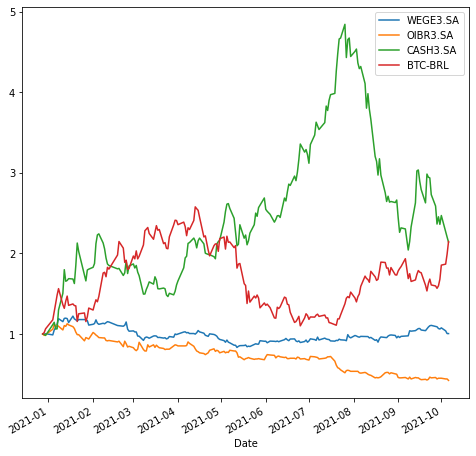

In [13]:
normalizado.plot(figsize = (8,8))

In [14]:
compras = {'WEGE3.SA':50,'OIBR3.SA':50,'CASH3.SA':50,'BTC-BRL':50}

In [15]:
compras_df = pd.Series(data=compras, index=list(compras.keys()))

In [16]:
sum(compras.values())

200

In [17]:
primeiro = precos.iloc[0]

In [18]:
qtd_acoes = compras_df/primeiro

In [19]:
PL = precos*qtd_acoes

In [20]:
PL.head()

,WEGE3.SA,OIBR3.SA,CASH3.SA,BTC-BRL
Date,,,,
2020-12-28,50.000000,50.000000,50.000000,50.000000
2020-12-29,49.768216,49.099100,49.738545,50.808893
2020-12-30,50.158937,49.549550,49.052277,53.173537
2021-01-04,49.417214,52.927925,55.751626,58.757034
2021-01-05,52.450325,55.855856,57.222217,63.714416


In [21]:
PL['PL TOTAL'] = PL.iloc[:].sum(axis = 1)

In [22]:
PL.head()

,WEGE3.SA,OIBR3.SA,CASH3.SA,BTC-BRL,PL TOTAL
Date,,,,,
2020-12-28,50.000000,50.000000,50.000000,50.000000,200.000000
2020-12-29,49.768216,49.099100,49.738545,50.808893,199.414755
2020-12-30,50.158937,49.549550,49.052277,53.173537,201.934301
2021-01-04,49.417214,52.927925,55.751626,58.757034,216.853800
2021-01-05,52.450325,55.855856,57.222217,63.714416,229.242813


In [23]:
ibov = yf.download('^BVSP',start=inicio,end=fim)

[*********************100%***********************]  1 of 1 completed


In [24]:
ibov.rename(columns={'Adj Close':'IBOV'}, inplace = True)

In [25]:
ibov = ibov.drop(ibov.columns[[0,1,2,3,5]], axis=1)

In [26]:
ibov.index = pd.to_datetime(ibov.index)

In [27]:
PL.index = pd.to_datetime(PL.index)

In [28]:
novo_df = pd.merge(ibov,PL,how='inner',on='Date')

In [29]:
PL.head()

,WEGE3.SA,OIBR3.SA,CASH3.SA,BTC-BRL,PL TOTAL
Date,,,,,
2020-12-28,50.000000,50.000000,50.000000,50.000000,200.000000
2020-12-29,49.768216,49.099100,49.738545,50.808893,199.414755
2020-12-30,50.158937,49.549550,49.052277,53.173537,201.934301
2021-01-04,49.417214,52.927925,55.751626,58.757034,216.853800
2021-01-05,52.450325,55.855856,57.222217,63.714416,229.242813


In [30]:
PL_normalizado = novo_df/novo_df.iloc[0]

In [31]:
PL_normalizado.head()

,IBOV,WEGE3.SA,OIBR3.SA,CASH3.SA,BTC-BRL,PL TOTAL
Date,,,,,,
2020-12-28,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-12-29,1.003561,0.995364,0.981982,0.994771,1.016178,0.997074
2020-12-30,1.002142,1.003179,0.990991,0.981046,1.063471,1.009672
2021-01-04,0.995859,0.988344,1.058559,1.115033,1.175141,1.084269
2021-01-05,1.001445,1.049006,1.117117,1.144444,1.274288,1.146214


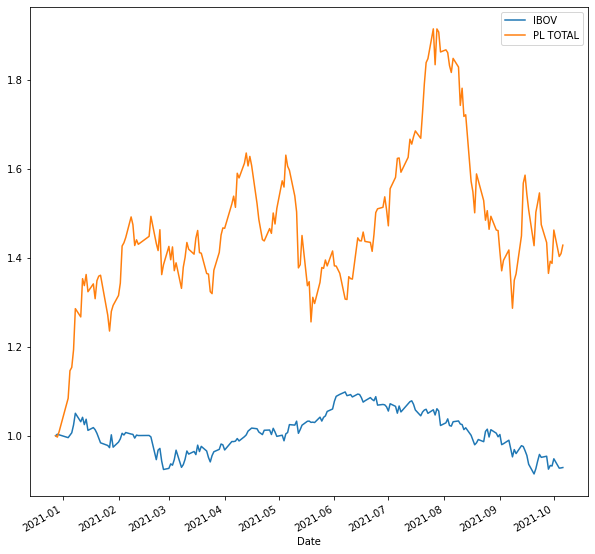

In [32]:
PL_normalizado[['IBOV','PL TOTAL']].plot(figsize=(10,10));